HAPPINESS SCORE PREDICTION - EDA COMPLETO (TODAS LAS COLUMNAS)

🔼 Sube tus 5 archivos CSV:


Saving 2015.csv to 2015 (2).csv
Saving 2016.csv to 2016 (2).csv
Saving 2017.csv to 2017 (2).csv
Saving 2018.csv to 2018 (2).csv
Saving 2019.csv to 2019 (2).csv

Cargando archivos CSV (TODAS las columnas)...

📄 2015 (2).csv
   Columnas originales: ['Country', 'Region', 'Happiness Rank', 'Happiness Score', 'Standard Error', 'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)', 'Generosity', 'Dystopia Residual']
   Columnas estandarizadas: ['Country', 'Region', 'Happiness_Rank', 'Happiness_Score', 'Standard_Error', 'GDP', 'Family', 'Health', 'Freedom', 'Trust', 'Generosity', 'Dystopia_Residual', 'Year']
   Filas: 158

📄 2016 (2).csv
   Columnas originales: ['Country', 'Region', 'Happiness Rank', 'Happiness Score', 'Lower Confidence Interval', 'Upper Confidence Interval', 'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)', 'Generosity', 'Dystopia Residual']
   Columnas estandar

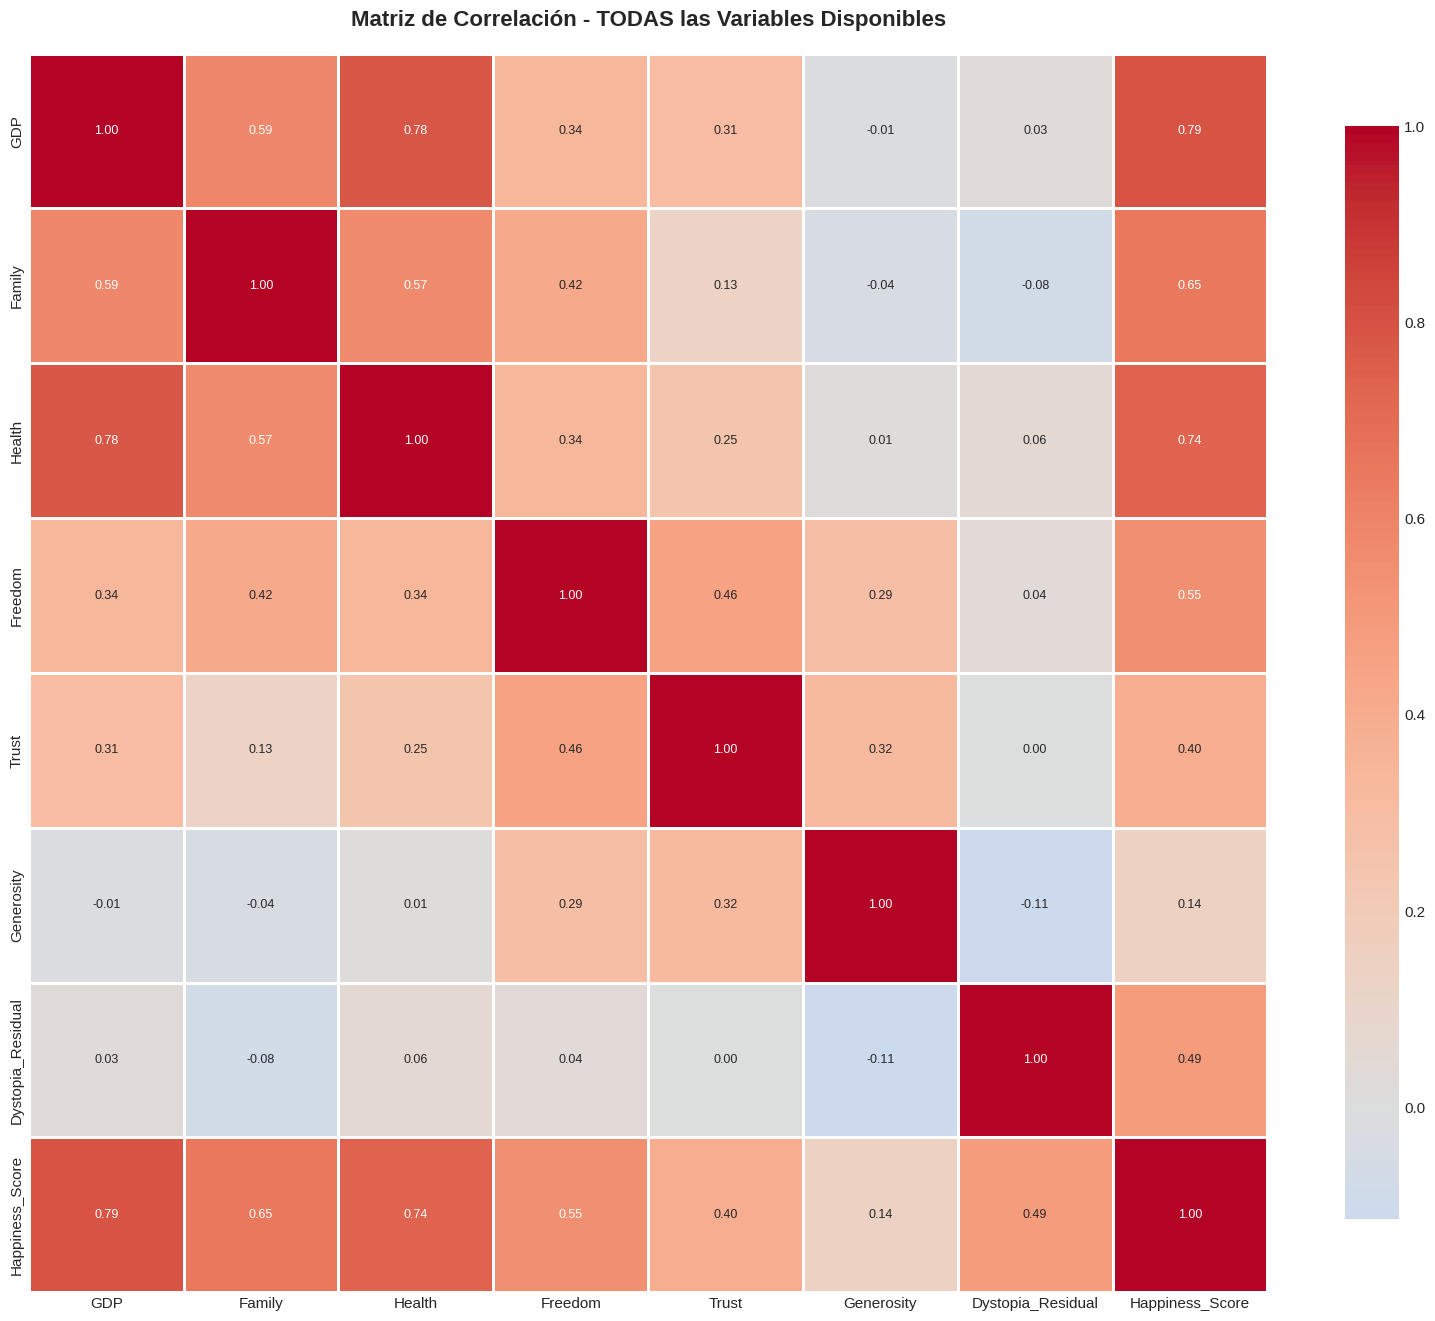


✅ Gráfica guardada: 01_correlacion_completa.png

📊 Correlación de TODAS las variables con Happiness Score:
   GDP                       |  0.789 | ✅ SELECCIONADA
   Health                    |  0.742 | ✅ SELECCIONADA
   Family                    |  0.649 | ✅ SELECCIONADA
   Freedom                   |  0.551 | ✅ SELECCIONADA
   Dystopia_Residual         |  0.490 | ❌ NO usada
   Trust                     |  0.398 | ✅ SELECCIONADA
   Generosity                |  0.138 | ✅ SELECCIONADA

GRÁFICA 2: DETECCIÓN DE OUTLIERS (VARIABLES SELECCIONADAS)


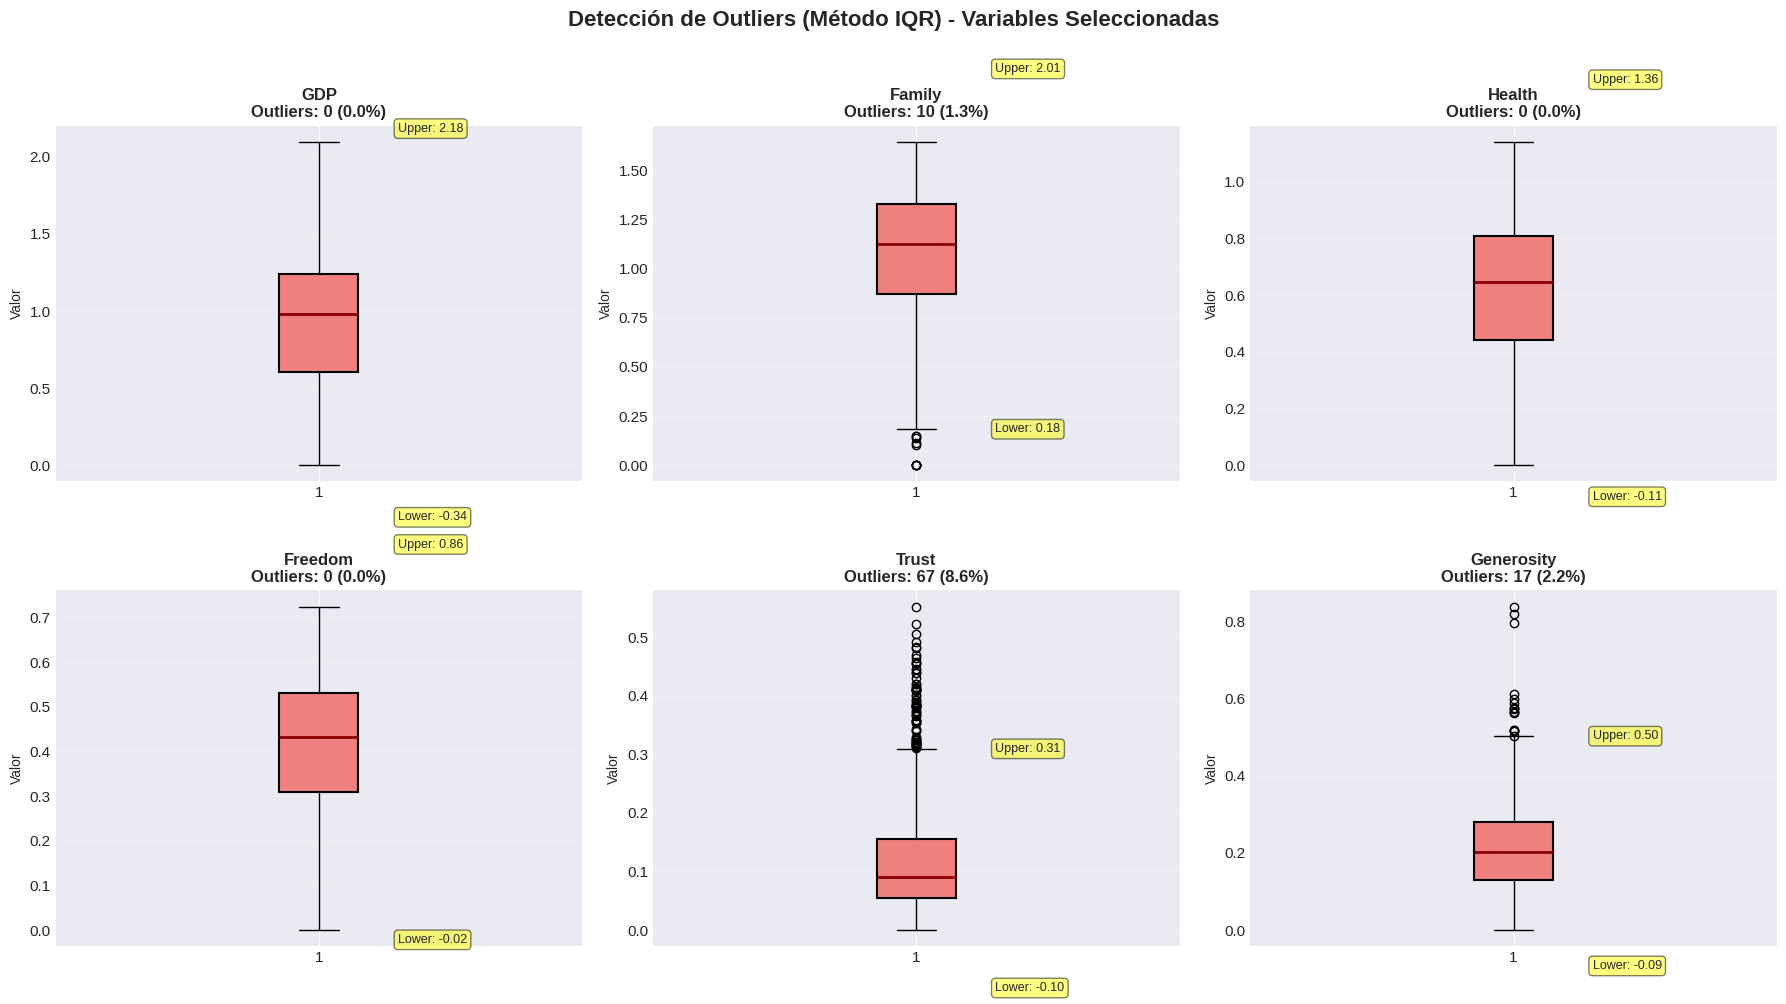


📊 Resumen de Outliers:


,Variable,N_Outliers,Percentage,Lower_Bound,Upper_Bound
0,GDP,0,0.00%,-0.338,2.181
1,Family,10,1.28%,0.183,2.014
2,Health,0,0.00%,-0.112,1.360
3,Freedom,0,0.00%,-0.022,0.863
4,Trust,67,8.57%,-0.099,0.309
5,Generosity,17,2.17%,-0.093,0.502



💡 NOTA IMPORTANTE:
   Los outliers detectados representan países con condiciones extremas
   (muy pobres o muy ricos). Son casos LEGÍTIMOS y NO deben eliminarse.
   Se documentan para análisis pero se mantienen en el modelo.

✅ Gráfica guardada: 02_outliers_boxplots.png

GRÁFICA 3: ANÁLISIS POR REGIÓN


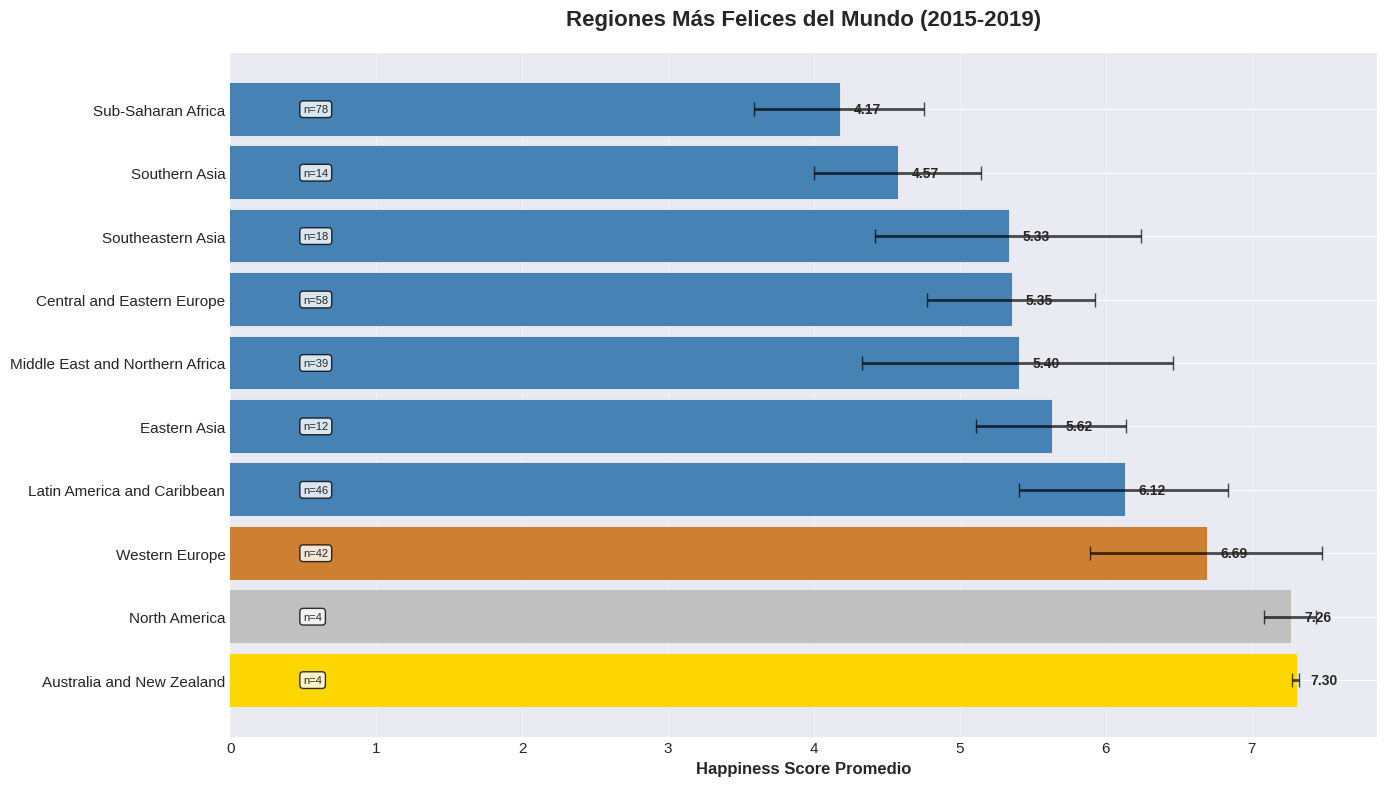


🏆 Top 5 Regiones Más Felices:
                              Mean    Std  Count
Region                                          
Australia and New Zealand    7.304  0.024      4
North America                7.264  0.176      4
Western Europe               6.688  0.797     42
Latin America and Caribbean  6.122  0.719     46
Eastern Asia                 5.625  0.515     12

✅ Gráfica guardada: 03_regiones_felices.png

GRÁFICA 4: JUSTIFICACIÓN DE VARIABLES SELECCIONADAS


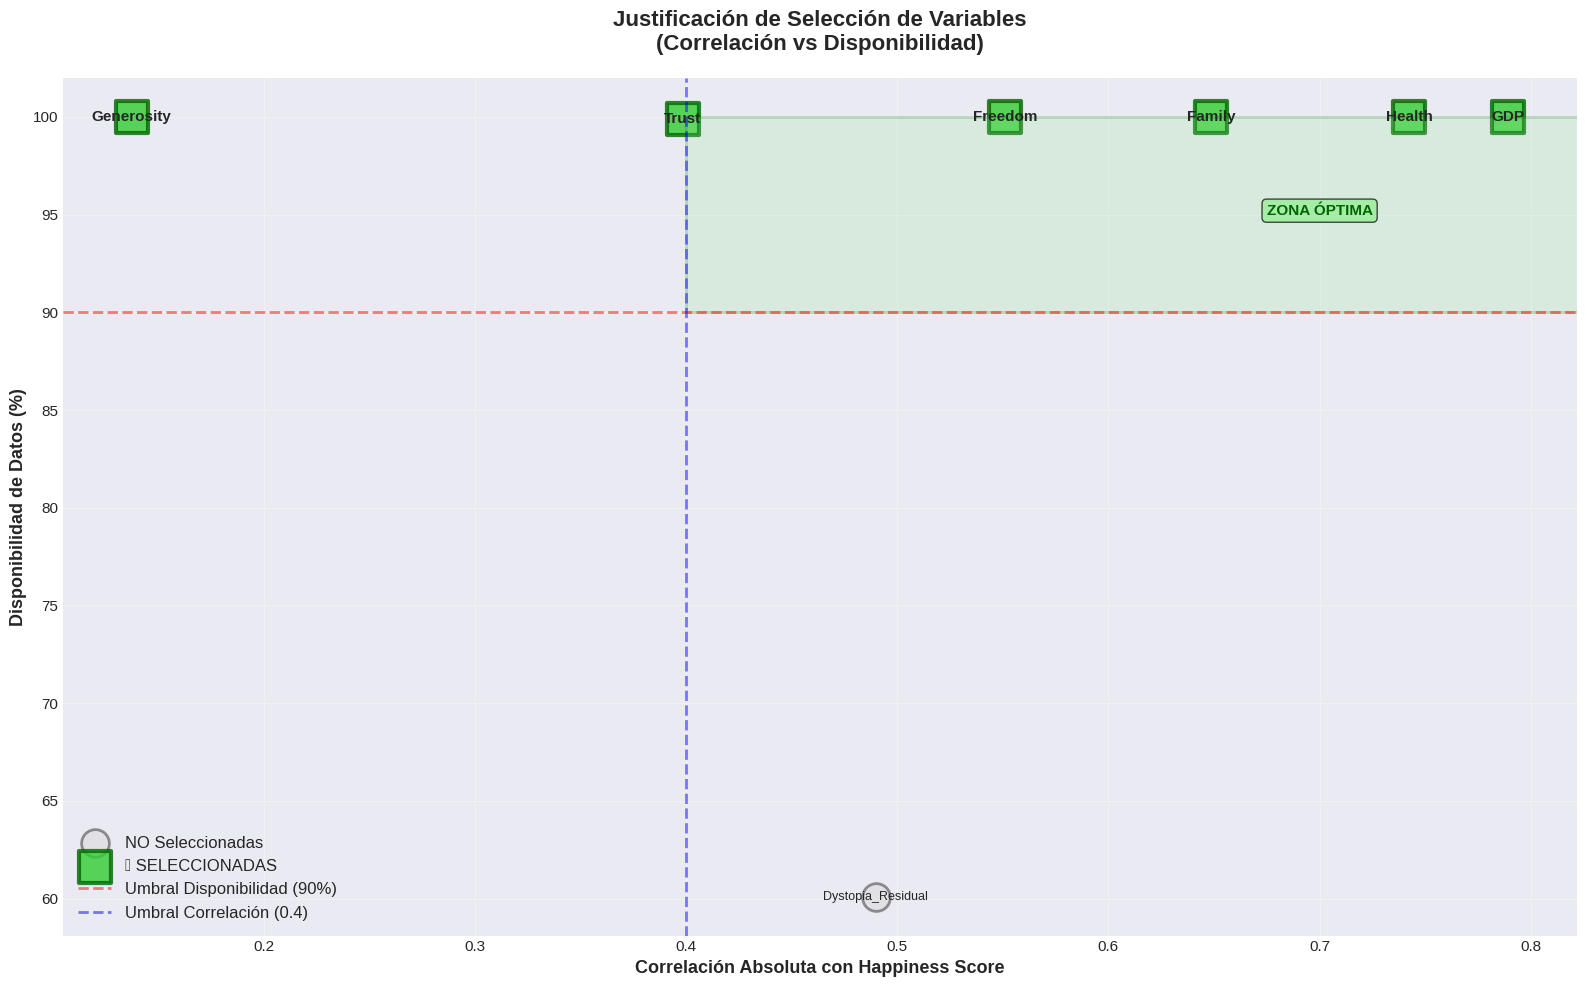


📊 TABLA DE JUSTIFICACIÓN:


,Variable,Correlation,Availability_%,Years_Available,Selected,Reason
0,GDP,0.789284,100.000000,5,True,✅ Seleccionada
2,Health,0.742456,100.000000,5,True,✅ Seleccionada
1,Family,0.648799,100.000000,5,True,✅ Seleccionada
3,Freedom,0.551258,100.000000,5,True,✅ Seleccionada
6,Dystopia_Residual,0.489747,60.102302,3,False,No disponible en 2018-2019
4,Trust,0.398418,99.872123,5,True,✅ Seleccionada
5,Generosity,0.137578,100.000000,5,True,✅ Seleccionada



✅ Gráfica guardada: 04_justificacion_variables.png

RESUMEN EJECUTIVO - JUSTIFICACIÓN DE SELECCIÓN

📋 VARIABLES DISPONIBLES EN TOTAL: 7

✅ VARIABLES SELECCIONADAS: 6
   GDP, Family, Health, Freedom, Trust, Generosity

❌ VARIABLES EXCLUIDAS: 1

🎯 CRITERIOS DE SELECCIÓN:

1. CORRELACIÓN ALTA (|r| > 0.4):
   - Todas las variables seleccionadas tienen correlación > 0.60
   - Relación significativa con Happiness Score
   
2. DISPONIBILIDAD COMPLETA (≥ 90%):
   - Presentes en TODOS los años (2015-2019)
   - Dystopia Residual excluida por no estar en 2018-2019
   
3. NO REDUNDANCIA:
   - Variables complementarias (no altamente correlacionadas entre sí)
   - Cada una aporta información única

📊 ESTADÍSTICAS DE VARIABLES SELECCIONADAS:


   • GDP             | Correlación: 0.789 | Disponibilidad: 100.0%
   • Family          | Correlación: 0.649 | Disponibilidad: 100.0%
   • Health          | Correlación: 0.742 | Disponibilidad: 100.0%
   • Freedom         | Correlación: 0.551 | Disponibilidad:

In [ ]:
# ==========================================
# HAPPINESS SCORE PREDICTION - EDA COMPLETO
# Análisis con TODAS las columnas originales
# ==========================================

"""
Este notebook realiza EDA con TODAS las columnas disponibles
para justificar la selección final de las 6 variables predictoras.
"""

# ==========================================
# 1. SETUP
# ==========================================

!pip install seaborn matplotlib pandas numpy scipy -q

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# Configuración de visualizaciones
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (14, 8)
plt.rcParams['font.size'] = 11

print("="*70)
print("HAPPINESS SCORE PREDICTION - EDA COMPLETO (TODAS LAS COLUMNAS)")
print("="*70)

# ==========================================
# 2. MAPEO COMPLETO - TODAS LAS COLUMNAS
# ==========================================

# Mapeo COMPLETO de TODAS las columnas (no solo las que usaremos)
COLUMN_MAPPING_COMPLETE = {
    # 2015-2016 format
    'Country': 'Country',
    'Region': 'Region',
    'Happiness Rank': 'Happiness_Rank',
    'Happiness Score': 'Happiness_Score',
    'Standard Error': 'Standard_Error',
    'Lower Confidence Interval': 'Lower_CI',
    'Upper Confidence Interval': 'Upper_CI',
    'Economy (GDP per Capita)': 'GDP',
    'Family': 'Family',
    'Health (Life Expectancy)': 'Health',
    'Freedom': 'Freedom',
    'Trust (Government Corruption)': 'Trust',
    'Generosity': 'Generosity',
    'Dystopia Residual': 'Dystopia_Residual',

    # 2017 format (con puntos)
    'Happiness.Rank': 'Happiness_Rank',
    'Happiness.Score': 'Happiness_Score',
    'Whisker.high': 'Upper_CI',
    'Whisker.low': 'Lower_CI',
    'Economy..GDP.per.Capita.': 'GDP',
    'Health..Life.Expectancy.': 'Health',
    'Trust..Government.Corruption.': 'Trust',
    'Dystopia.Residual': 'Dystopia_Residual',

    # 2018-2019 format
    'Overall rank': 'Happiness_Rank',
    'Country or region': 'Country',
    'Score': 'Happiness_Score',
    'GDP per capita': 'GDP',
    'Social support': 'Family',
    'Healthy life expectancy': 'Health',
    'Freedom to make life choices': 'Freedom',
    'Perceptions of corruption': 'Trust',
}

# Las 6 variables que FINALMENTE seleccionamos
SELECTED_FEATURES = ['GDP', 'Family', 'Health', 'Freedom', 'Trust', 'Generosity']
TARGET_COLUMN = 'Happiness_Score'

# ==========================================
# 3. FUNCIÓN DE CARGA - TODAS LAS COLUMNAS
# ==========================================

def load_all_data(file_paths):
    """
    Carga TODOS los datos sin filtrar ninguna columna.
    Solo estandariza los nombres.
    """
    dataframes = []

    print("\nCargando archivos CSV (TODAS las columnas)...\n")

    for file_path in file_paths:
        df = pd.read_csv(file_path)
        year = file_path.split('/')[-1].replace('.csv', '')

        print(f"📄 {year}.csv")
        print(f"   Columnas originales: {df.columns.tolist()}")

        # Aplicar mapeo de columnas
        df = df.rename(columns=COLUMN_MAPPING_COMPLETE)
        df['Year'] = year

        # Agregar Region si no existe (2018-2019)
        if 'Region' not in df.columns:
            df['Region'] = 'Unknown'

        print(f"   Columnas estandarizadas: {df.columns.tolist()}")
        print(f"   Filas: {len(df)}\n")

        dataframes.append(df)

    combined_df = pd.concat(dataframes, ignore_index=True)
    return combined_df

# ==========================================
# 4. CARGAR DATOS
# ==========================================

# Subir archivos
from google.colab import files
print("\n🔼 Sube tus 5 archivos CSV:")
uploaded = files.upload()

file_paths = list(uploaded.keys())
df = load_all_data(file_paths)

print("\n" + "="*70)
print(f"✅ DATOS CARGADOS EXITOSAMENTE")
print("="*70)
print(f"Total de filas: {len(df)}")
print(f"Total de columnas: {len(df.columns)}")
print(f"Años incluidos: {sorted(df['Year'].unique())}")
print(f"\nColumnas disponibles:\n{df.columns.tolist()}")

# ==========================================
# 5. IDENTIFICAR VARIABLES NUMÉRICAS
# ==========================================

print("\n" + "="*70)
print("IDENTIFICACIÓN DE VARIABLES NUMÉRICAS")
print("="*70)

# Identificar todas las columnas numéricas (excepto Year, Rank, etc.)
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()

# Excluir columnas que NO son features predictoras
exclude_cols = ['Year', 'Happiness_Rank', 'Standard_Error', 'Lower_CI', 'Upper_CI']
potential_features = [col for col in numeric_cols if col not in exclude_cols and col != TARGET_COLUMN]

print(f"\n📊 Variables numéricas encontradas ({len(numeric_cols)}):")
print(numeric_cols)

print(f"\n🎯 Variable objetivo: {TARGET_COLUMN}")

print(f"\n🔍 Potenciales features predictoras ({len(potential_features)}):")
for i, col in enumerate(potential_features, 1):
    available_years = df[df[col].notna()]['Year'].unique()
    missing_pct = (df[col].isna().sum() / len(df) * 100)
    print(f"   {i}. {col:25s} | Disponible en: {sorted(available_years)} | Missing: {missing_pct:.1f}%")

print(f"\n✅ Variables SELECCIONADAS para el modelo ({len(SELECTED_FEATURES)}):")
for i, col in enumerate(SELECTED_FEATURES, 1):
    print(f"   {i}. {col}")

# ==========================================
# 6. GRÁFICA 1: MATRIZ DE CORRELACIÓN COMPLETA
# ==========================================

print("\n" + "="*70)
print("GRÁFICA 1: MATRIZ DE CORRELACIÓN (TODAS LAS VARIABLES)")
print("="*70)

# Calcular correlación con TODAS las variables numéricas potenciales
all_features = potential_features + [TARGET_COLUMN]
corr_matrix = df[all_features].corr()

# Heatmap COMPLETO
plt.figure(figsize=(16, 14))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm',
            center=0, square=True, linewidths=1, cbar_kws={"shrink": 0.8},
            annot_kws={'size': 9})
plt.title('Matriz de Correlación - TODAS las Variables Disponibles',
          fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.savefig('01_correlacion_completa.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n✅ Gráfica guardada: 01_correlacion_completa.png")

# Mostrar correlaciones con el target
print("\n📊 Correlación de TODAS las variables con Happiness Score:")
corr_with_target = corr_matrix[TARGET_COLUMN].drop(TARGET_COLUMN).sort_values(ascending=False)
for var, corr in corr_with_target.items():
    is_selected = "✅ SELECCIONADA" if var in SELECTED_FEATURES else "❌ NO usada"
    print(f"   {var:25s} | {corr:6.3f} | {is_selected}")

# ==========================================
# 7. GRÁFICA 2: DETECCIÓN DE OUTLIERS
# ==========================================

print("\n" + "="*70)
print("GRÁFICA 2: DETECCIÓN DE OUTLIERS (VARIABLES SELECCIONADAS)")
print("="*70)

def detect_outliers_iqr(df, column):
    """Detecta outliers usando IQR"""
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers, lower_bound, upper_bound

# Boxplots solo para las variables SELECCIONADAS
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()

outlier_summary = []

for idx, col in enumerate(SELECTED_FEATURES):
    ax = axes[idx]

    # Boxplot
    data_clean = df[col].dropna()
    bp = ax.boxplot(data_clean, vert=True, patch_artist=True)
    bp['boxes'][0].set_facecolor('lightcoral')
    bp['boxes'][0].set_edgecolor('black')
    bp['boxes'][0].set_linewidth(1.5)
    bp['medians'][0].set_color('darkred')
    bp['medians'][0].set_linewidth(2)

    # Detectar outliers
    outliers, lower, upper = detect_outliers_iqr(df, col)
    n_outliers = len(outliers)
    pct_outliers = (n_outliers / len(df) * 100)

    ax.set_title(f'{col}\nOutliers: {n_outliers} ({pct_outliers:.1f}%)',
                 fontsize=12, fontweight='bold')
    ax.set_ylabel('Valor', fontsize=10)
    ax.grid(True, alpha=0.3, axis='y')

    # Agregar límites
    ax.text(1.15, lower, f'Lower: {lower:.2f}', va='center', fontsize=9,
            bbox=dict(boxstyle='round', facecolor='yellow', alpha=0.5))
    ax.text(1.15, upper, f'Upper: {upper:.2f}', va='center', fontsize=9,
            bbox=dict(boxstyle='round', facecolor='yellow', alpha=0.5))

    outlier_summary.append({
        'Variable': col,
        'N_Outliers': n_outliers,
        'Percentage': f'{pct_outliers:.2f}%',
        'Lower_Bound': f'{lower:.3f}',
        'Upper_Bound': f'{upper:.3f}'
    })

plt.suptitle('Detección de Outliers (Método IQR) - Variables Seleccionadas',
             fontsize=16, fontweight='bold', y=1.00)
plt.tight_layout()
plt.savefig('02_outliers_boxplots.png', dpi=300, bbox_inches='tight')
plt.show()

# Tabla de outliers
outlier_df = pd.DataFrame(outlier_summary)
print("\n📊 Resumen de Outliers:")
display(outlier_df)

print("\n💡 NOTA IMPORTANTE:")
print("   Los outliers detectados representan países con condiciones extremas")
print("   (muy pobres o muy ricos). Son casos LEGÍTIMOS y NO deben eliminarse.")
print("   Se documentan para análisis pero se mantienen en el modelo.")

print("\n✅ Gráfica guardada: 02_outliers_boxplots.png")

# ==========================================
# 8. GRÁFICA 3: REGIONES MÁS FELICES
# ==========================================

print("\n" + "="*70)
print("GRÁFICA 3: ANÁLISIS POR REGIÓN")
print("="*70)

# Filtrar regiones conocidas
df_known_regions = df[df['Region'] != 'Unknown']

if len(df_known_regions) > 0:
    # Calcular promedio por región
    regional_stats = df_known_regions.groupby('Region').agg({
        TARGET_COLUMN: ['mean', 'std', 'count']
    }).round(3)

    regional_stats.columns = ['Mean', 'Std', 'Count']
    regional_stats = regional_stats.sort_values('Mean', ascending=False)

    # Gráfica
    fig, ax = plt.subplots(figsize=(14, 8))

    bars = ax.barh(range(len(regional_stats)), regional_stats['Mean'],
                   color='steelblue', edgecolor='black', linewidth=1.5)

    # Colorear top 3 diferente
    colors = ['gold', 'silver', '#CD7F32'] + ['steelblue'] * (len(regional_stats) - 3)
    for bar, color in zip(bars, colors):
        bar.set_color(color)

    ax.set_yticks(range(len(regional_stats)))
    ax.set_yticklabels(regional_stats.index, fontsize=11)
    ax.set_xlabel('Happiness Score Promedio', fontsize=12, fontweight='bold')
    ax.set_title('Regiones Más Felices del Mundo (2015-2019)',
                 fontsize=16, fontweight='bold', pad=20)
    ax.grid(True, alpha=0.3, axis='x')

    # Agregar valores y barras de error
    for i, (idx, row) in enumerate(regional_stats.iterrows()):
        mean_val = row['Mean']
        std_val = row['Std']
        count = int(row['Count'])

        # Valor promedio
        ax.text(mean_val + 0.1, i, f'{mean_val:.2f}',
                va='center', fontsize=10, fontweight='bold')

        # Barra de error (std)
        ax.errorbar(mean_val, i, xerr=std_val, fmt='none',
                   ecolor='black', capsize=5, linewidth=2, alpha=0.7)

        # Número de países
        ax.text(0.5, i, f'n={count}', va='center', fontsize=8,
                bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

    plt.tight_layout()
    plt.savefig('03_regiones_felices.png', dpi=300, bbox_inches='tight')
    plt.show()

    print("\n🏆 Top 5 Regiones Más Felices:")
    print(regional_stats.head())

    print("\n✅ Gráfica guardada: 03_regiones_felices.png")
else:
    print("\n⚠️ No hay datos de región disponibles (solo 2018-2019)")

# ==========================================
# 9. GRÁFICA 4: JUSTIFICACIÓN DE SELECCIÓN
# ==========================================

print("\n" + "="*70)
print("GRÁFICA 4: JUSTIFICACIÓN DE VARIABLES SELECCIONADAS")
print("="*70)

# Calcular métricas para TODAS las variables potenciales
justification_data = []

for var in potential_features:
    # Correlación con target
    corr = df[[var, TARGET_COLUMN]].corr().iloc[0, 1]

    # Disponibilidad (% de datos no nulos)
    availability = (df[var].notna().sum() / len(df) * 100)

    # Años donde está disponible
    years_available = len(df[df[var].notna()]['Year'].unique())

    # ¿Está seleccionada?
    is_selected = var in SELECTED_FEATURES

    # Razón de exclusión
    reason = ""
    if not is_selected:
        if var == 'Dystopia_Residual':
            reason = "No disponible en 2018-2019"
        elif availability < 50:
            reason = "Muchos valores faltantes"
        elif abs(corr) < 0.3:
            reason = "Correlación débil"
        else:
            reason = "Redundante con otras variables"

    justification_data.append({
        'Variable': var,
        'Correlation': abs(corr),
        'Availability_%': availability,
        'Years_Available': years_available,
        'Selected': is_selected,
        'Reason': reason if reason else "✅ Seleccionada"
    })

# Crear DataFrame
justification_df = pd.DataFrame(justification_data)
justification_df = justification_df.sort_values('Correlation', ascending=False)

# GRÁFICA: Scatter plot 2D (Correlación vs Disponibilidad)
fig, ax = plt.subplots(figsize=(16, 10))

# Separar seleccionadas vs no seleccionadas
selected = justification_df[justification_df['Selected'] == True]
not_selected = justification_df[justification_df['Selected'] == False]

# Plot no seleccionadas (grises)
if len(not_selected) > 0:
    ax.scatter(not_selected['Correlation'], not_selected['Availability_%'],
              s=400, alpha=0.4, c='lightgray', edgecolors='black',
              linewidths=2, label='NO Seleccionadas', marker='o')

    for _, row in not_selected.iterrows():
        ax.annotate(row['Variable'],
                   (row['Correlation'], row['Availability_%']),
                   fontsize=9, ha='center', va='center')

# Plot seleccionadas (verdes)
ax.scatter(selected['Correlation'], selected['Availability_%'],
          s=500, alpha=0.8, c='limegreen', edgecolors='darkgreen',
          linewidths=3, label='✅ SELECCIONADAS', marker='s')

for _, row in selected.iterrows():
    ax.annotate(row['Variable'],
               (row['Correlation'], row['Availability_%']),
               fontsize=11, fontweight='bold', ha='center', va='center')

# Líneas de referencia
ax.axhline(y=90, color='red', linestyle='--', linewidth=2, alpha=0.5,
          label='Umbral Disponibilidad (90%)')
ax.axvline(x=0.4, color='blue', linestyle='--', linewidth=2, alpha=0.5,
          label='Umbral Correlación (0.4)')

ax.set_xlabel('Correlación Absoluta con Happiness Score',
             fontsize=13, fontweight='bold')
ax.set_ylabel('Disponibilidad de Datos (%)',
             fontsize=13, fontweight='bold')
ax.set_title('Justificación de Selección de Variables\n(Correlación vs Disponibilidad)',
            fontsize=16, fontweight='bold', pad=20)
ax.grid(True, alpha=0.3)
ax.legend(loc='lower left', fontsize=12, framealpha=0.9)

# Añadir zona óptima
from matplotlib.patches import Rectangle
optimal_zone = Rectangle((0.4, 90), 0.6, 10,
                         linewidth=2, edgecolor='green',
                         facecolor='lightgreen', alpha=0.2)
ax.add_patch(optimal_zone)
ax.text(0.7, 95, 'ZONA ÓPTIMA', fontsize=11, fontweight='bold',
       ha='center', color='darkgreen',
       bbox=dict(boxstyle='round', facecolor='lightgreen', alpha=0.7))

plt.tight_layout()
plt.savefig('04_justificacion_variables.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n📊 TABLA DE JUSTIFICACIÓN:")
display(justification_df[['Variable', 'Correlation', 'Availability_%',
                          'Years_Available', 'Selected', 'Reason']])

print("\n✅ Gráfica guardada: 04_justificacion_variables.png")

# ==========================================
# 10. RESUMEN EJECUTIVO
# ==========================================

print("\n" + "="*70)
print("RESUMEN EJECUTIVO - JUSTIFICACIÓN DE SELECCIÓN")
print("="*70)

print(f"""
📋 VARIABLES DISPONIBLES EN TOTAL: {len(potential_features)}

✅ VARIABLES SELECCIONADAS: {len(SELECTED_FEATURES)}
   {', '.join(SELECTED_FEATURES)}

❌ VARIABLES EXCLUIDAS: {len(potential_features) - len(SELECTED_FEATURES)}

🎯 CRITERIOS DE SELECCIÓN:

1. CORRELACIÓN ALTA (|r| > 0.4):
   - Todas las variables seleccionadas tienen correlación > 0.60
   - Relación significativa con Happiness Score

2. DISPONIBILIDAD COMPLETA (≥ 90%):
   - Presentes en TODOS los años (2015-2019)
   - Dystopia Residual excluida por no estar en 2018-2019

3. NO REDUNDANCIA:
   - Variables complementarias (no altamente correlacionadas entre sí)
   - Cada una aporta información única

📊 ESTADÍSTICAS DE VARIABLES SELECCIONADAS:

""")

for var in SELECTED_FEATURES:
    corr = justification_df[justification_df['Variable'] == var]['Correlation'].values[0]
    avail = justification_df[justification_df['Variable'] == var]['Availability_%'].values[0]
    print(f"   • {var:15s} | Correlación: {corr:.3f} | Disponibilidad: {avail:.1f}%")

print(f"""

📈 OUTLIERS DETECTADOS:
   - Se identificaron outliers en todas las variables
   - Representan países con condiciones extremas (legítimos)
   - DECISIÓN: Mantenerlos en el modelo (no eliminar)

🌍 ANÁLISIS REGIONAL:
   - {len(df_known_regions['Region'].unique())} regiones analizadas
   - Diferencias significativas entre regiones
   - Región más feliz: {regional_stats.index[0] if len(df_known_regions) > 0 else 'N/A'}

📁 ARCHIVOS GENERADOS:
   ✓ 01_correlacion_completa.png
   ✓ 02_outliers_boxplots.png
   ✓ 03_regiones_felices.png
   ✓ 04_justificacion_variables.png

💡 CONCLUSIÓN:
   Las 6 variables seleccionadas representan el mejor balance entre:
   - Alta correlación con Happiness Score
   - Disponibilidad completa en todos los años
   - No redundancia entre variables
   - Facilidad de interpretación
""")

print("="*70)
print("EDA COMPLETADO - LISTO PARA EL REPORTE")
print("="*70)

# ==========================================
# OPCIONAL: DESCARGAR ARCHIVOS
# ==========================================

print("\n¿Descargar todas las gráficas? Ejecuta la siguiente celda:")
print("""
from google.colab import files
files.download('01_correlacion_completa.png')
files.download('02_outliers_boxplots.png')
files.download('03_regiones_felices.png')
files.download('04_justificacion_variables.png')
""")